## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# 데이터 불러오기
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


# EDA(데이터 탐색)

In [3]:
df.shape

(64374, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe(include='all')

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374,64374.000000,64374.000000,64374.000000,64374.000000,64374,64374,64374.000000,64374.000000,64374.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,Standard,Monthly,NaN,NaN,NaN
freq,NaN,NaN,34353,NaN,NaN,NaN,NaN,21502,22130,NaN,NaN,NaN
mean,32187.500000,41.970982,NaN,31.994827,15.080234,5.400690,17.133952,NaN,NaN,541.023379,15.498850,0.473685
std,18583.317451,13.924911,NaN,17.098234,8.816470,3.114005,8.852211,NaN,NaN,260.874809,8.638436,0.499311
min,1.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,NaN,18.000000,7.000000,3.000000,10.000000,NaN,NaN,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,NaN,33.000000,15.000000,6.000000,19.000000,NaN,NaN,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,NaN,47.000000,23.000000,8.000000,25.000000,NaN,NaN,768.000000,23.000000,1.000000


In [6]:
for col in list(df.columns):
    print(df[col].value_counts(dropna=False), '\n')

CustomerID
1        1
42922    1
42909    1
42910    1
42911    1
        ..
21463    1
21464    1
21465    1
21466    1
64374    1
Name: count, Length: 64374, dtype: int64 

Age
55    1486
53    1482
52    1475
65    1474
63    1473
58    1449
54    1422
61    1414
36    1405
60    1402
57    1401
62    1397
64    1395
56    1392
20    1388
47    1386
37    1367
51    1366
43    1353
39    1349
25    1348
34    1342
31    1340
29    1330
59    1330
30    1324
27    1315
44    1314
49    1310
42    1295
41    1294
35    1291
38    1289
23    1285
32    1284
26    1281
45    1281
19    1279
46    1279
28    1278
18    1274
22    1266
50    1260
33    1257
48    1253
24    1252
21    1251
40    1196
Name: count, dtype: int64 

Gender
Female    34353
Male      30021
Name: count, dtype: int64 

Tenure
46    1242
37    1225
57    1221
50    1209
55    1207
30    1202
52    1195
29    1192
39    1181
35    1180
60    1178
44    1175
48    1174
49    1173
26    1173
53    1171
24    1170
51  

<Axes: xlabel='Age', ylabel='Count'>

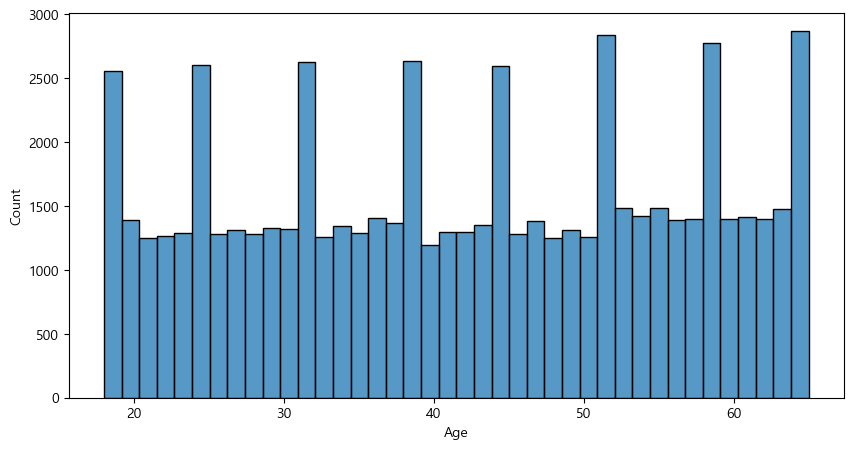

In [7]:
sns.histplot(df['Age'])

In [8]:
df['Age'].describe()

count    64374.000000
mean        41.970982
std         13.924911
min         18.000000
25%         30.000000
50%         42.000000
75%         54.000000
max         65.000000
Name: Age, dtype: float64

In [9]:
# 나이대별 column을 새롭게 생성
age_group = pd.cut(df['Age'],
                            bins=[10, 20, 30, 40, 50, 60, 70],
                            right=False,
                            labels=['10s' ,'20s', '30s', '40s', '50s', '60s'])

# 나이대별 column의 위치를 Age column 뒤로 위치시키기
df.insert(
    loc=df.columns.get_loc('Age') + 1,
    column='Age_group',
    value=age_group,
)

In [10]:
df[['Age', 'Age_group']]

,Age,Age_group
0,22,20s
1,41,40s
2,47,40s
3,35,30s
4,53,50s
...,...,...
64369,45,40s
64370,37,30s
64371,25,20s
64372,50,50s


In [102]:
df['Age_group'] = df['Age_group'].astype(str)
df['Age_group'].value_counts()

Age_group
50s    14063
30s    13248
20s    12994
40s    12961
60s     8555
10s     2553
Name: count, dtype: int64

In [12]:
df_agegroup = df.groupby('Age_group').sum(numeric_only=True).reset_index()
df_agegroup

,Age_group,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,10s,80984332,47233,82138,39779,13927,44116,1361124,39993,1140
1,20s,407744703,318351,415553,200725,70048,223900,7011647,200766,5777
2,30s,416788624,457394,427576,202657,71518,229247,7140107,205494,5919
3,40s,410789984,577234,416224,198258,68935,223944,7020513,200517,5782
4,50s,469437921,766751,446151,203780,76491,237317,7632862,219107,7390
5,60s,286292561,534877,271993,125576,46745,144457,4661586,131846,4485


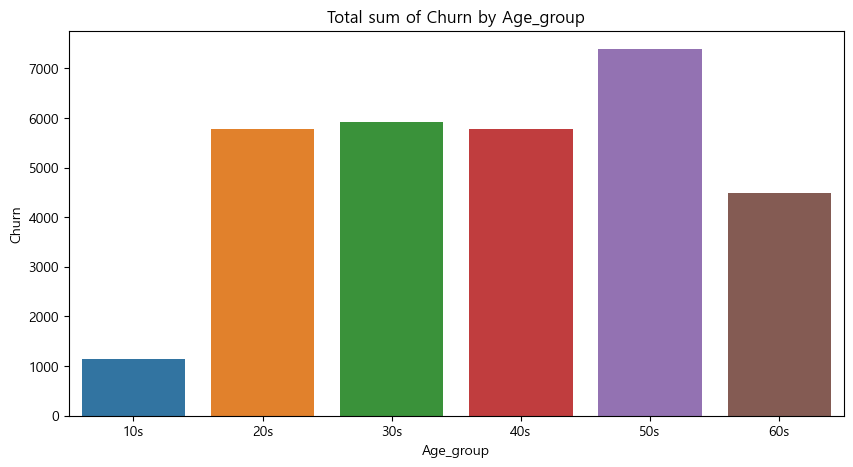

In [13]:
sns.barplot(df_agegroup, x='Age_group', y='Churn', errorbar=None)
plt.title('Total sum of Churn by Age_group')
plt.show()

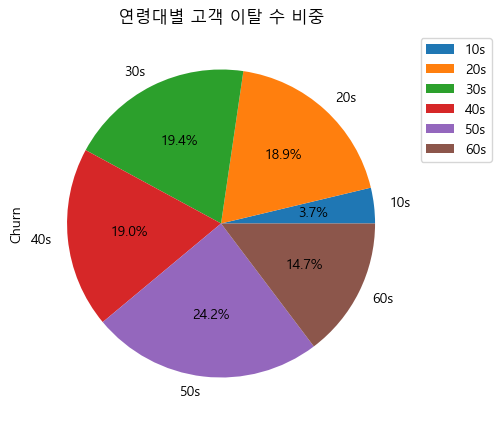

In [14]:
df_agegroup.plot(kind='pie', y='Churn', labels=df_agegroup['Age_group'], autopct='%.1f%%')
plt.title('연령대별 고객 이탈 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

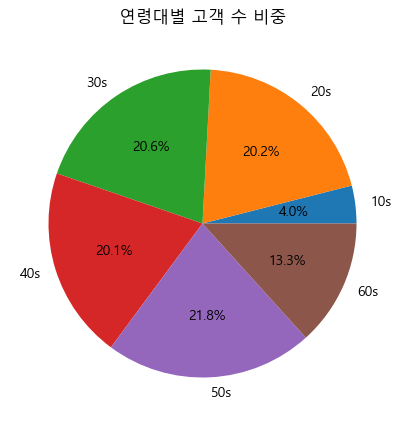

In [15]:
df.groupby('Age_group').size().plot(kind='pie', autopct='%.1f%%')
plt.title('연령대별 고객 수 비중')
plt.show()

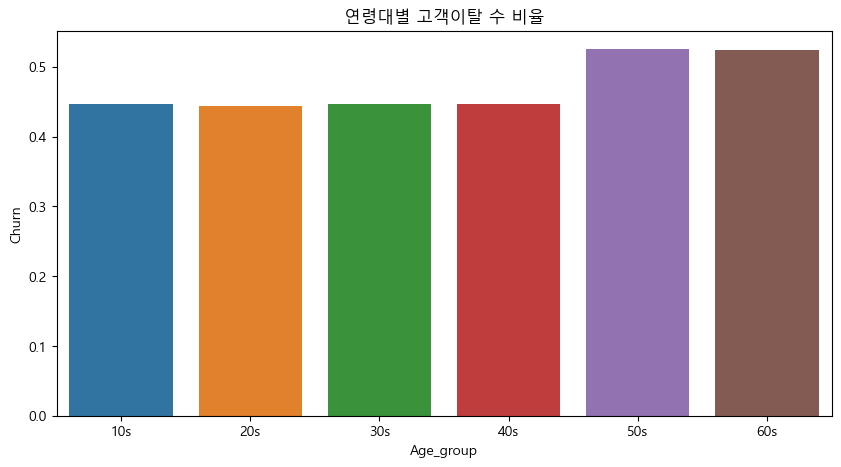

In [16]:
sns.barplot(df, x='Age_group', y='Churn', errorbar=None)
plt.title('연령대별 고객이탈 수 비율')
plt.show()

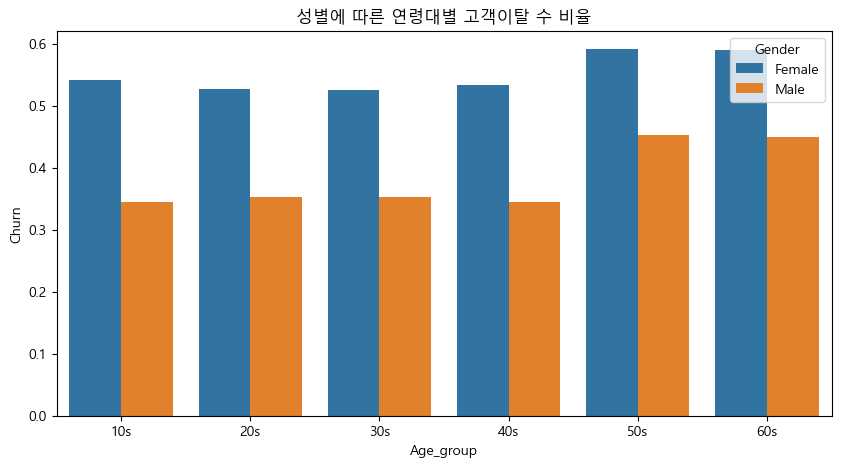

In [17]:
sns.barplot(df, x='Age_group', y='Churn', errorbar=None, hue='Gender')
plt.title('성별에 따른 연령대별 고객이탈 수 비율')
plt.show()

50, 60대에서 고객 이탈의 비율이 가장 높게 나타남, 여성이 남성보다 고객이탈이 대체적으로 높게 나타남

In [18]:
df.groupby('Age_group').size().reset_index()

,Age_group,0
0,10s,2553
1,20s,12994
2,30s,13248
3,40s,12961
4,50s,14063
5,60s,8555


In [19]:
df_agegroup['group_count'] = df.groupby('Age_group').size().reset_index()[0]
df_agegroup

,Age_group,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,group_count
0,10s,80984332,47233,82138,39779,13927,44116,1361124,39993,1140,2553
1,20s,407744703,318351,415553,200725,70048,223900,7011647,200766,5777,12994
2,30s,416788624,457394,427576,202657,71518,229247,7140107,205494,5919,13248
3,40s,410789984,577234,416224,198258,68935,223944,7020513,200517,5782,12961
4,50s,469437921,766751,446151,203780,76491,237317,7632862,219107,7390,14063
5,60s,286292561,534877,271993,125576,46745,144457,4661586,131846,4485,8555


In [20]:
# 인당 소비금액
df_agegroup['Spend by 1 person'] = df_agegroup['Total Spend'] / df_agegroup['group_count']

Text(0.5, 1.0, '연령대별 인당 소비 금액')

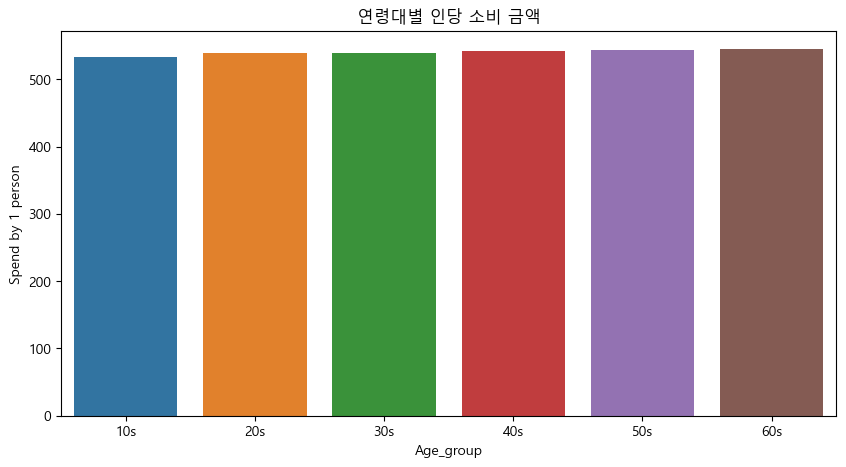

In [21]:
sns.barplot(data=df_agegroup, x='Age_group', y='Spend by 1 person')
plt.title('연령대별 인당 소비 금액')

Text(0.5, 1.0, '연령대별 Payment Delay')

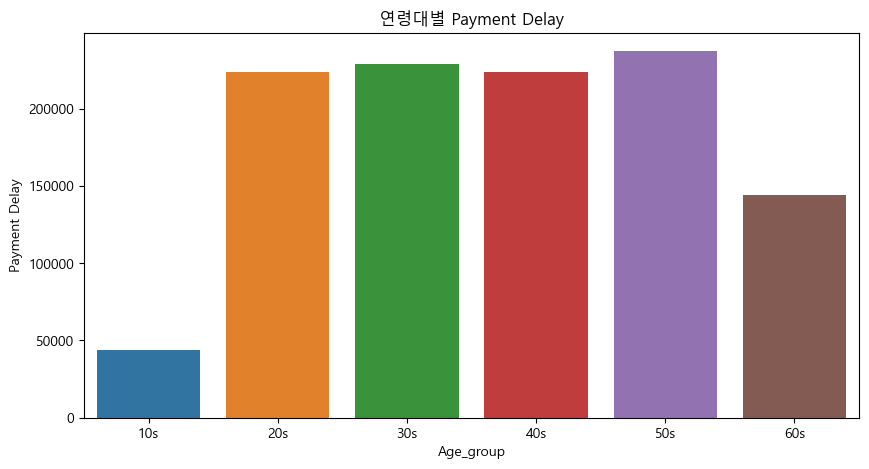

In [22]:
sns.barplot(data=df_agegroup, x='Age_group', y='Payment Delay')
plt.title('연령대별 Payment Delay')

Text(0.5, 1.0, '연령대별 Payment Delay 비율')

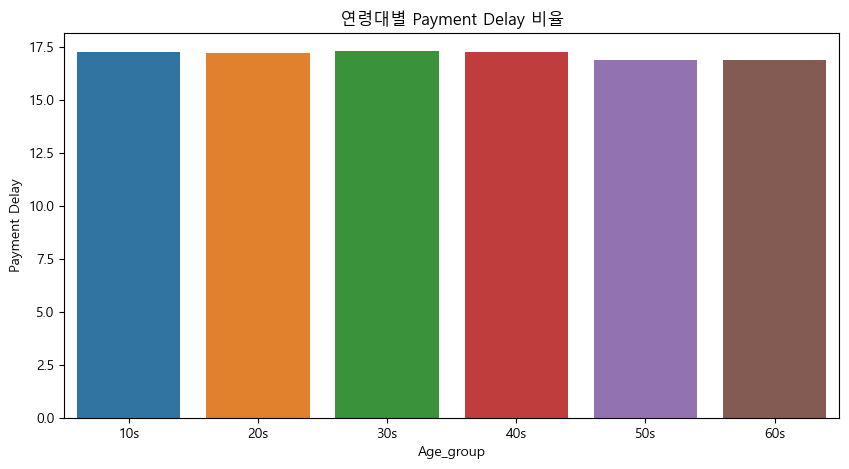

In [23]:
sns.barplot(data=df, x='Age_group', y='Payment Delay', errorbar=None)
plt.title('연령대별 Payment Delay 비율')

In [24]:
df_subtype = df.groupby('Subscription Type').sum(numeric_only=True).reset_index()
df_subtype

,Subscription Type,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,Basic,692558488,899650,685179,323588,116347,368426,11603029,333651,10356
1,Premium,687007629,897125,683867,323131,115215,365958,11644061,330642,9960
2,Standard,692472008,905065,690589,324056,116102,368597,11580749,333430,10177


In [25]:
df.groupby('Subscription Type').size()

Subscription Type
Basic       21451
Premium     21421
Standard    21502
dtype: int64

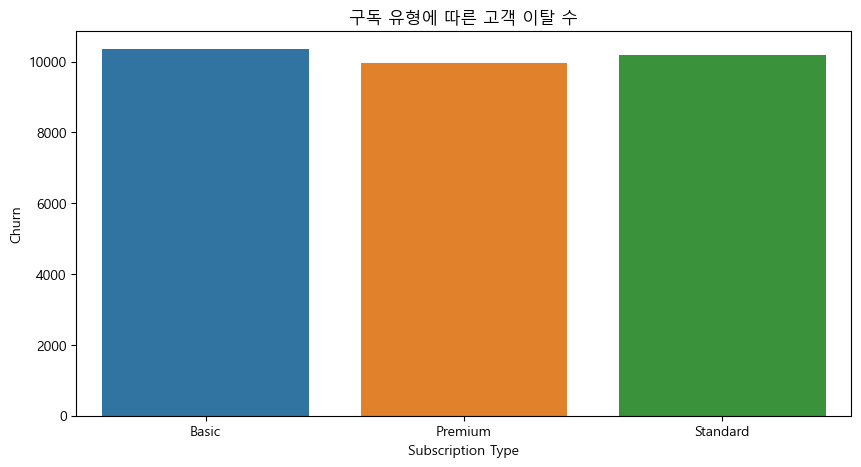

In [26]:
sns.barplot(df_subtype, x='Subscription Type', y='Churn', errorbar=None)
plt.title('구독 유형에 따른 고객 이탈 수')
plt.show()

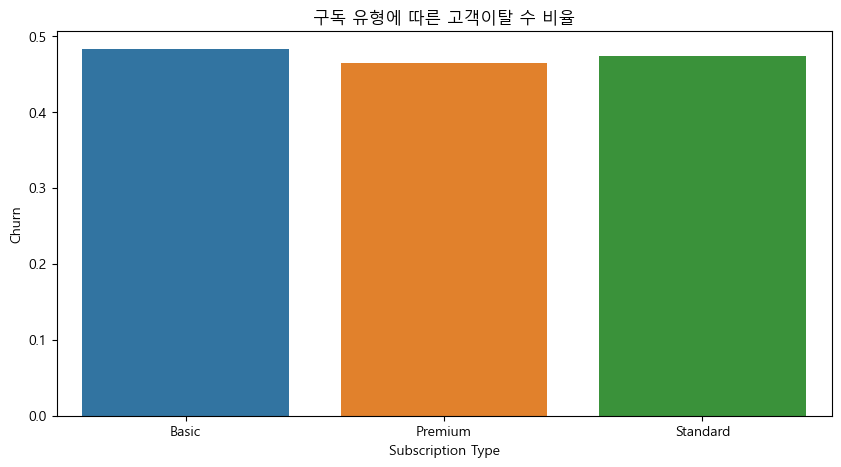

In [27]:
sns.barplot(df, x='Subscription Type', y='Churn', errorbar=None, order=['Basic', 'Premium', 'Standard'])
plt.title('구독 유형에 따른 고객이탈 수 비율')
plt.show()

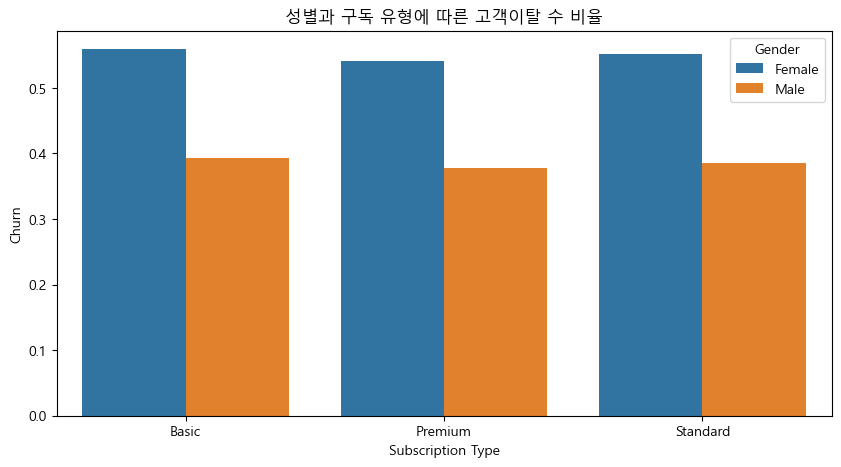

In [28]:
sns.barplot(df, x='Subscription Type', y='Churn', errorbar=None, hue='Gender', order=['Basic', 'Premium', 'Standard'])
plt.title('성별과 구독 유형에 따른 고객이탈 수 비율')
plt.show()

구독 유형에 따른 고객이탈 수 비율은 Premium이 가장 낮게 나타나지만 큰 차이를 보이지는 않음, 여성이 남성보다 좀 더 고객이탈이 높게 나타나지만 구독 유형에 따른 큰 차이를 보이지는 않음

In [29]:
df_contract = df.groupby('Contract Length').sum(numeric_only=True).reset_index()
df_contract

,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,Annual,685276844,898286,685548,319186,116664,362531,11439478,330853,9895
1,Monthly,731004197,929376,706317,335900,117947,386894,12170215,343206,11421
2,Quarterly,655757084,874178,667770,315689,113053,353556,11218146,323664,9177


In [30]:
df.groupby('Contract Length').size()

Contract Length
Annual       21410
Monthly      22130
Quarterly    20834
dtype: int64

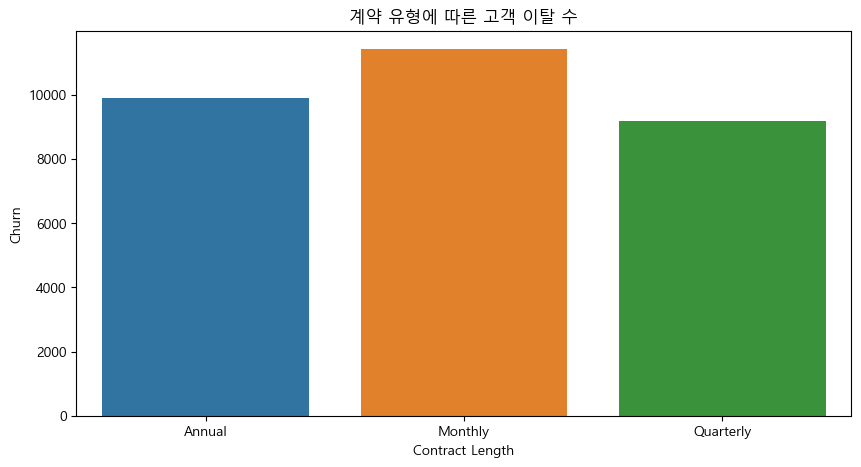

In [31]:
sns.barplot(df_contract, x='Contract Length', y='Churn', errorbar=None)
plt.title('계약 유형에 따른 고객 이탈 수')
plt.show()

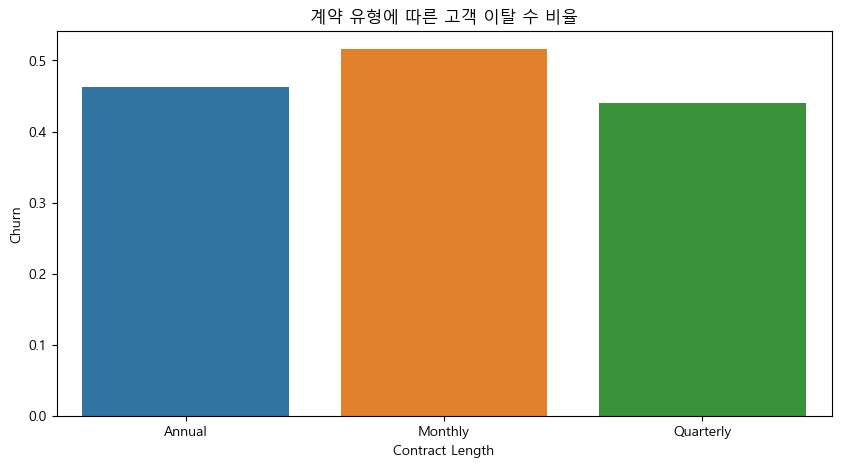

In [32]:
sns.barplot(df, x='Contract Length', y='Churn', errorbar=None, order=['Annual', 'Monthly', 'Quarterly'])
plt.title('계약 유형에 따른 고객 이탈 수 비율')
plt.show()

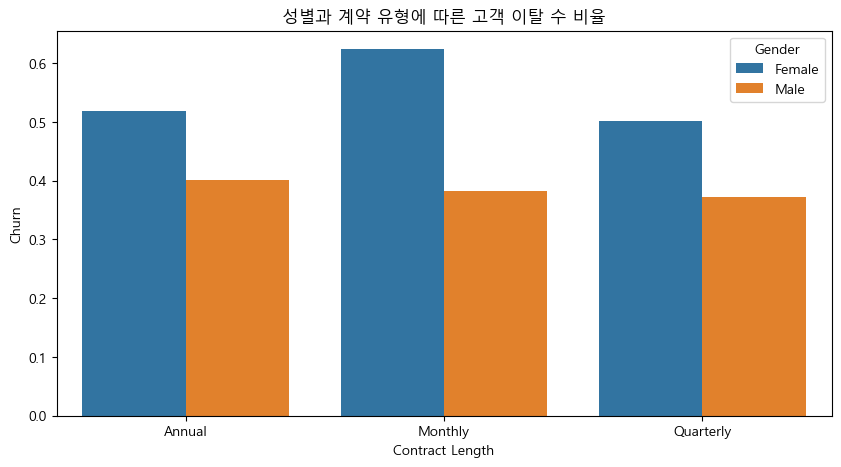

In [33]:
sns.barplot(df, x='Contract Length', y='Churn', errorbar=None, hue='Gender', order=['Annual', 'Monthly', 'Quarterly'])
plt.title('성별과 계약 유형에 따른 고객 이탈 수 비율')
plt.show()

계약 유형이 짧을수록 고객 이탈의 비중이 높게 나타남, 남성의 경우 계약 유형에 따른 차이가 미비하지만 여성의 경우 차이가 뚜렷함

<Axes: >

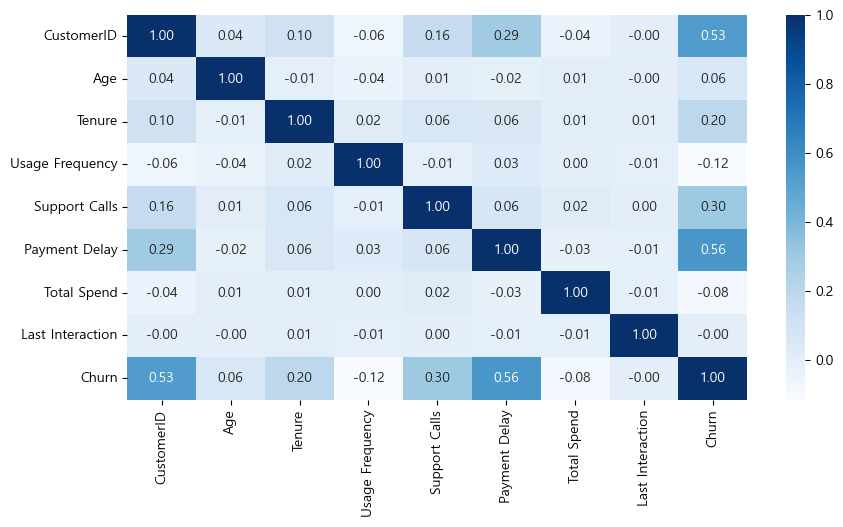

In [34]:
# 상관관계 확인
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')

In [35]:
df

,CustomerID,Age,Age_group,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,20s,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,40s,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,40s,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,30s,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,50s,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,40s,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,30s,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,20s,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,50s,Female,18,19,7,22,Standard,Monthly,540,13,1


In [36]:
df_agegroup_subtype = df.groupby(['Age_group', 'Subscription Type']).sum(numeric_only=True).reset_index()
df_agegroup_subtype

,Age_group,Subscription Type,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,10s,Basic,28451625,16588,28835,14326,4889,15261,473574,14102,403
1,10s,Premium,26140071,15419,27061,12958,4492,14643,449855,13058,367
2,10s,Standard,26392636,15226,26242,12495,4546,14212,437695,12833,370
3,20s,Basic,133765526,105083,137555,65385,23384,74166,2313878,67025,1936
4,20s,Premium,138027291,107370,138950,68247,23348,75021,2370856,66414,1896
5,20s,Standard,135951886,105898,139048,67093,23316,74713,2326913,67327,1945
6,30s,Basic,141721670,152443,143172,68027,23781,76792,2384275,68755,2039
7,30s,Premium,139421619,154882,143169,68212,23950,77847,2414336,69716,1968
8,30s,Standard,135645335,150069,141235,66418,23787,74608,2341496,67023,1912
9,40s,Basic,135378080,191416,137326,65657,23122,74735,2332331,66213,1949


Text(0.5, 1.0, '연령대별/구독유형별 고객 이탈 수')

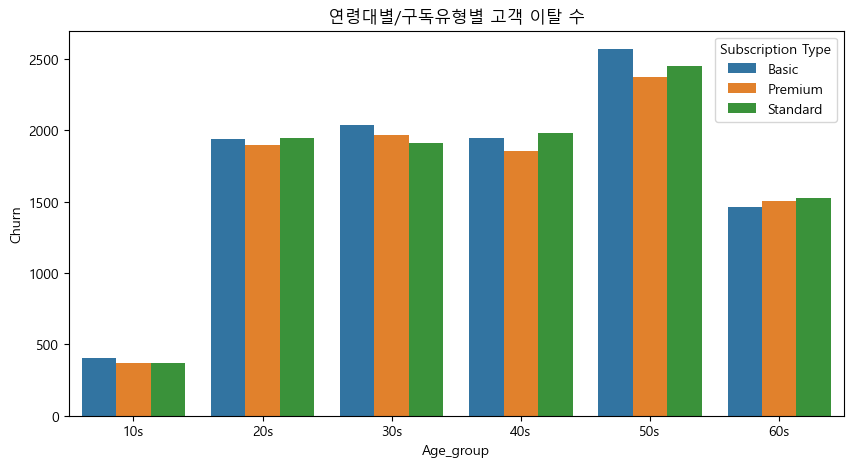

In [37]:
sns.barplot(data=df_agegroup_subtype, x='Age_group', y='Churn', hue='Subscription Type')
plt.title('연령대별/구독유형별 고객 이탈 수')

In [38]:
df_agegroup_contract = df.groupby(['Age_group', 'Contract Length']).sum(numeric_only=True).reset_index()
df_agegroup_contract

,Age_group,Contract Length,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,10s,Annual,28530699,16451,29182,13558,5068,15001,477120,13759,400
1,10s,Monthly,27470586,15507,26426,13180,4507,15098,443650,13217,419
2,10s,Quarterly,24983047,15275,26530,13041,4352,14017,440354,13017,321
3,20s,Annual,135185007,105241,136916,64482,23288,73454,2274316,66057,1883
4,20s,Monthly,145002886,111269,145634,71139,24302,79966,2487374,70341,2230
5,20s,Quarterly,127556810,101841,133003,65104,22458,70480,2249957,64368,1664
6,30s,Annual,138481696,151649,141553,66845,23966,74808,2323207,67924,1927
7,30s,Monthly,144508824,155230,144674,68681,23792,78353,2455206,69645,2174
8,30s,Quarterly,133798104,150515,141349,67131,23760,76086,2361694,67925,1818
9,40s,Annual,134413851,193168,139105,65575,23227,73932,2331709,67077,1883


Text(0.5, 1.0, '연령대별/계약유형별 고객 이탈 수')

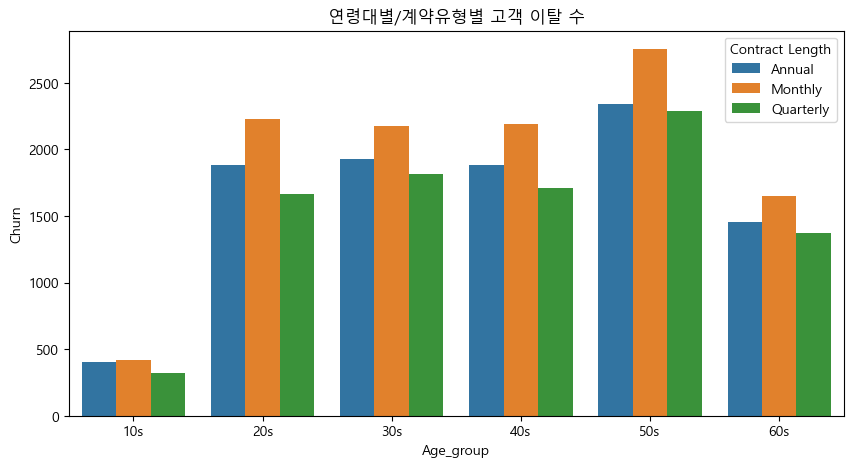

In [39]:
sns.barplot(data=df_agegroup_contract, x='Age_group', y='Churn', hue='Contract Length')
plt.title('연령대별/계약유형별 고객 이탈 수')

# 전처리

In [40]:
df.head()

,CustomerID,Age,Age_group,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,20s,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,40s,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,40s,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,30s,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,50s,Female,58,24,9,2,Standard,Annual,533,18,0


In [41]:
# 결측치 확인
df.isna().sum()

CustomerID           0
Age                  0
Age_group            0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [42]:
# 중복값 확인
df.duplicated().sum()

0

In [43]:
# 필요없는 column 삭제
df = df.drop(['CustomerID', 'Age'], axis=1)

# 분석

In [44]:
df

,Age_group,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,20s,Female,25,14,4,27,Basic,Monthly,598,9,1
1,40s,Female,28,28,7,13,Standard,Monthly,584,20,0
2,40s,Male,27,10,2,29,Premium,Annual,757,21,0
3,30s,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,50s,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,40s,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,30s,Male,6,1,5,22,Standard,Annual,923,9,1
64371,20s,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50s,Female,18,19,7,22,Standard,Monthly,540,13,1


In [104]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(X.shape)
print(y.shape)

(64374, 10)
(64374,)


In [47]:
# 원-핫 인코딩
X_encoded = pd.get_dummies(X, columns=['Age_group', 'Gender', 'Subscription Type', 'Contract Length'], dtype='int64')
X_encoded

,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Age_group_10s,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,25,14,4,27,598,9,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,28,28,7,13,584,20,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,27,10,2,29,757,21,0,0,0,1,0,0,0,1,0,1,0,1,0,0
3,9,12,5,17,232,18,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,58,24,9,2,533,18,0,0,0,0,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,947,14,0,0,0,1,0,0,1,0,1,0,0,0,0,1
64370,6,1,5,22,923,9,0,0,1,0,0,0,0,1,0,0,1,1,0,0
64371,39,14,8,30,327,20,0,1,0,0,0,0,0,1,0,1,0,0,1,0
64372,18,19,7,22,540,13,0,0,0,0,1,0,1,0,0,0,1,0,1,0


# RF

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=123, test_size=0.25)

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Train F1 Score:', {train_f1})
print(f'Test F1 Score:', {test_f1})

Train F1 Score: {1.0}
Test F1 Score: {0.99598710611144}


In [63]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.9962097676152604


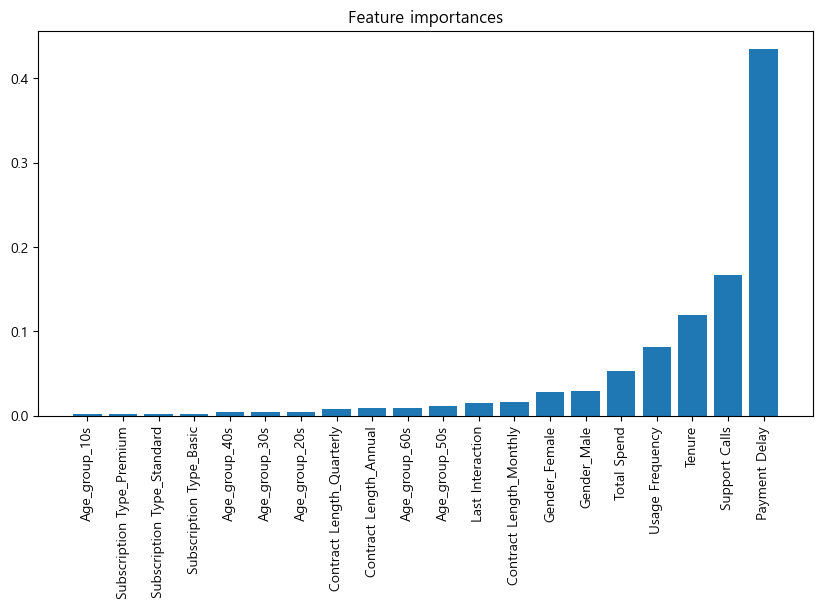

In [65]:
importances = rf.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_encoded.columns[indices_sorted], rotation=90)
plt.show()

# XGB

In [71]:
import xgboost as xgb

# XGBoost 모델 정의
model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류 문제일 경우
    eval_metric='logloss',
    use_label_encoder=False
)

# 모델 학습
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [76]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Train F1 Score:', {train_f1})
print(f'Test F1 Score:', {test_f1})

Train F1 Score: {1.0}
Test F1 Score: {0.9986871471708022}


In [77]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9987573008574624


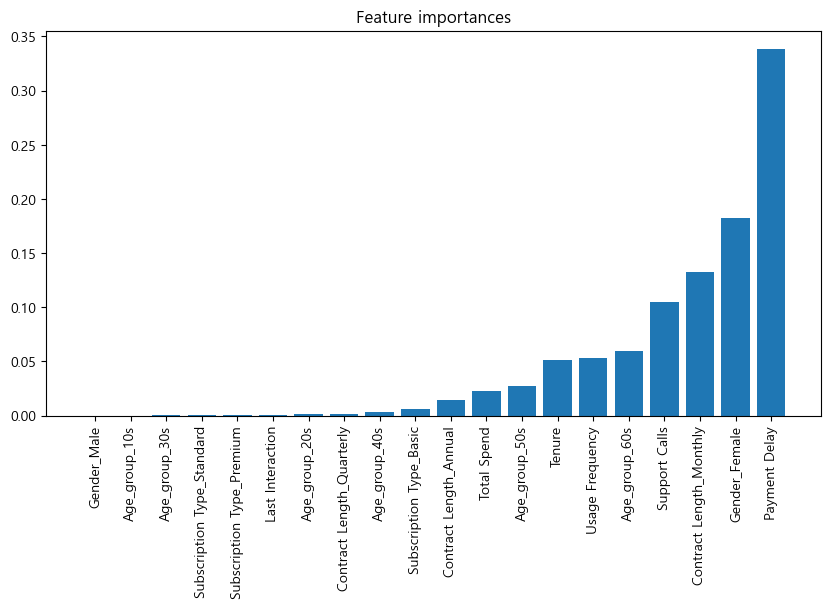

In [75]:
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_encoded.columns[indices_sorted], rotation=90)
plt.show()

# LGB

In [80]:
import lightgbm as lgb

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 모델 파라미터 설정
params = {
    'objective': 'binary',  # 이진 분류
    'metric': 'binary_error',  # 이진 분류 오류
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # 트리의 리프 노드 개수
    'learning_rate': 0.05,  # 학습률
    'feature_fraction': 0.9  # 피처 샘플링 비율
}

# 모델 학습
model = lgb.train(params,
                  train_data,
                  valid_sets=[test_data],
                  num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10)])
                             

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22886, number of negative: 25394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 48280, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474027 -> initscore=-0.103988
[LightGBM] [Info] Start training from score -0.103988
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_error: 0.00180191


In [82]:
# 예측 (확률값 반환)
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)

# 확률을 이진 값으로 변환
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9982
F1 Score: 0.9981


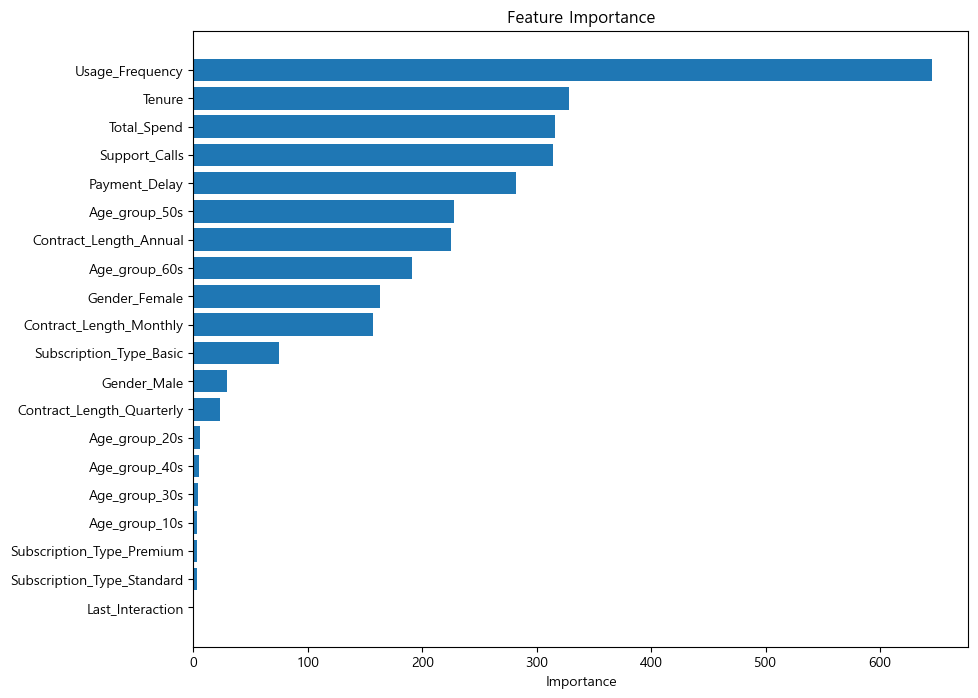

In [89]:
# 피처 중요도 추출
importance = model.feature_importance()
feature_names = model.feature_name()

# 중요도를 DataFrame으로 정리
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='importance')

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# CAT

In [105]:
cat_features = list(X.columns[X.dtypes == 'object'])
cat_features

['Age_group', 'Gender', 'Subscription Type', 'Contract Length']

In [97]:
!pip install catboost

^C


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)

from catboost import CatBoostClassifier

model = CatBoostClassifier(cat_features=cat_features, verbose=0)
model.fit(X_train, y_train)

In [107]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Train F1 Score:', {train_f1})
print(f'Test F1 Score:', {test_f1})

Train F1 Score: {0.9992140767585033}
Test F1 Score: {0.9986212330116211}


In [109]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9992543496271749
0.9986951659003356


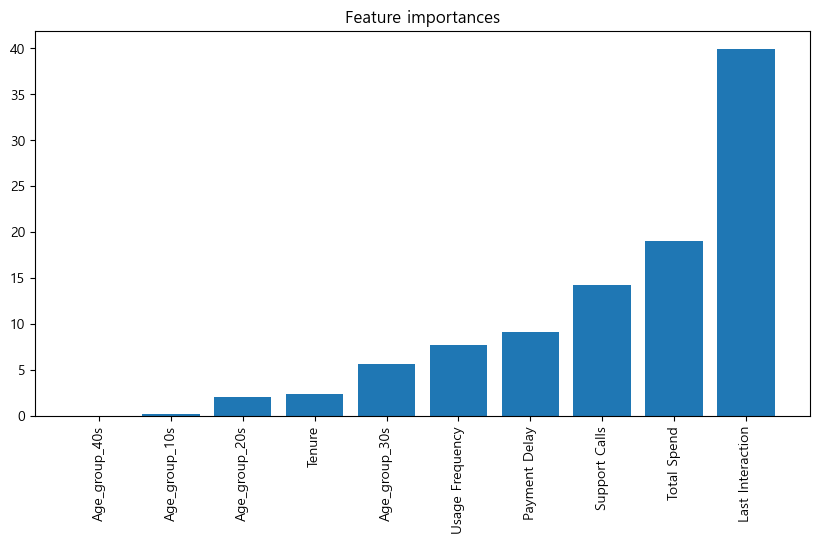

In [108]:
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_encoded.columns[indices_sorted], rotation=90)
plt.show()